In [18]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Dict, Tuple
import cmsstyle as CMS
import mplhep as hep

def getHistAndErrs(
    binning: np.array, 
    values: np.array, 
    weights: np.array
    ) -> Tuple[np.array, np.array] :
    np_hist, _ = np.histogram(values, bins=binning, weights = weights)
    np_hist_w2, _ = np.histogram(values, bins=binning, weights = weights*weights)
    np_hist_err = np.sqrt(np_hist_w2)
    return np_hist, np_hist_err


def plotDataMC_compare(
    binning: np.array, 
    data: Dict[str, np.array], 
    bkg_MC_dict: Dict[str, Dict[str, np.array]], 
    save_full_path: str,
    sig_MC_dict = {},
    title="default title", 
    xtitle="Mass (GeV)", 
    plot_ratio=True,
    log_scale=True,
    ):
    """
    Takes in 
    Params:
    binning : np array of bin edges compatible to np.histogram 
    data: Dictionary with "values" and "weights" as keys and relevant np array for values
    bkg_MC_dict: Ordered dictionary with the bkg_MC sample names as keys and its respective dictionary to histogram as values
        the keys are ordered such that bkg_MC sample with the least yield iterate first
    save_full_path: full path INCLUDING the filename to save the plot at
    sig_MC_dict: dictionary with same structure as bkg_MC_dict. if an empty dictionary, plot only Data and MC
    """
    plt.style.use(hep.style.CMS)

    if plot_ratio:
        fig, (ax_main, ax_ratio) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    else: # skip ratio plot
        fig, ax_main = plt.subplots()
    if log_scale:
        ax_main.set_yscale('log')
        ax_main.set_ylim(0.01, 1e9)
    
    # -----------------------------------------
    # plot data
    # -----------------------------------------
    values = data["values"]
    weights = data["weights"]
    data_hist, data_hist_err = getHistAndErrs(binning, values, weights)
    hep.histplot(
        data_hist, 
        xerr=True, 
        yerr=data_hist_err,
        bins=binning, 
        stack=False, 
        histtype='errorbar', 
        color='black', 
        label='Data', 
        ax=ax_main
    )
    # -----------------------------------------
    # plot bkg_MC
    # -----------------------------------------
    # collect bkg_MC samples
    bkg_MC_hist_l = []
    bkg_MC_histW2_l = []
    bkg_mc_sample_names = []
    for bkg_mc_sample, bkg_mc_sample_arrs in bkg_MC_dict.items():
        values = bkg_mc_sample_arrs["values"]
        weights = bkg_mc_sample_arrs["weights"]
        np_hist, _ = np.histogram(values, bins=binning, weights = weights)
        np_hist_w2, _ = np.histogram(values, bins=binning, weights = weights*weights)
        bkg_mc_sample_names.append(bkg_mc_sample)
        bkg_MC_hist_l.append(np_hist)
        bkg_MC_histW2_l.append(np_hist_w2)
    # plot bkg_MC in one go
    hep.histplot(
        bkg_MC_hist_l, 
        bins=binning, 
        stack=True, 
        histtype='fill', 
        label=bkg_mc_sample_names, 
        ax=ax_main,
        sort='label_r',
    )
    ax_main.set_ylabel("Events")
    
    if plot_ratio:
        # get bkg_MC errors
        bkg_mc_w2_sum = np.sum(np.asarray(bkg_MC_histW2_l), axis=0)
        bkg_mc_err = np.sqrt(bkg_mc_w2_sum)
        # initialize ratio histogram and fill in values
        ratio_hist = np.zeros_like(data_hist)
        bkg_mc_sum = np.sum(np.asarray(bkg_MC_hist_l), axis=0)
        inf_filter = bkg_mc_sum>0
        ratio_hist[inf_filter] = data_hist[inf_filter]/  bkg_mc_sum[inf_filter]
        # add relative uncertainty of data and bkg_mc by adding by quadrature
        rel_unc_ratio = np.sqrt((bkg_mc_err/bkg_mc_sum)**2 + (data_hist_err/data_hist)**2)
        ratio_err = rel_unc_ratio*ratio_hist

        
        hep.histplot(ratio_hist, 
                     bins=binning, histtype='errorbar', yerr=ratio_err, 
                     color='black', label='Ratio', ax=ax_ratio)
        ax_ratio.axhline(1, color='gray', linestyle='--')
        ax_ratio.set_xlabel(xtitle)
        ax_ratio.set_ylabel('Data / bkg_MC')
        ax_ratio.set_xlim(binning[0], binning[-1])
        # ax_ratio.set_ylim(0.6, 1.4)
        ax_ratio.set_ylim(0.5,1.5) 
    else:
        ax_main.set_xlabel(xtitle)


    # -----------------------------------------
    # plot signal MC
    # -----------------------------------------
    if len(sig_MC_dict.keys()) > 0:
        for sig_mc_sample,  sig_mc_sample_arrs in sig_MC_dict.items():
            values = sig_mc_sample_arrs["values"]
            weights = sig_mc_sample_arrs["weights"]
            sig_MC_hist, _ = getHistAndErrs(binning, values, weights)
            hep.histplot(
                sig_MC_hist, 
                bins=binning, 
                histtype='step', 
                label=sig_mc_sample, 
                # color =  "black",
                ax=ax_main,
            )

    # -----------------------------------------
    # Legend, title, save figure
    # -----------------------------------------
    ax_main.legend(loc="upper right")
    ax_main.set_title(title)
    # save figure, we assume that the directory exists
    plt.savefig(save_full_path)
    

['dimuon_mass', 'DNN_score', 'DNN_score_sigmoid', 'wgt_nominal_total', 'h_peak', 'h_sidebands', 'dimuon_pt', 'dimuon_pt_log', 'dimuon_eta', 'dimuon_ebe_mass_res', 'dimuon_ebe_mass_res_rel', 'dimuon_cos_theta_cs', 'dimuon_phi_cs', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_qgl', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_qgl', 'jj_mass', 'jj_mass_log', 'jj_dEta', 'rpt', 'll_zstar_log', 'mmj_min_dEta', 'nsoftjets5_nominal', 'htsoft2_nominal', 'year']
feature: dimuon_mass


NameError: name 'hist_ggh' is not defined

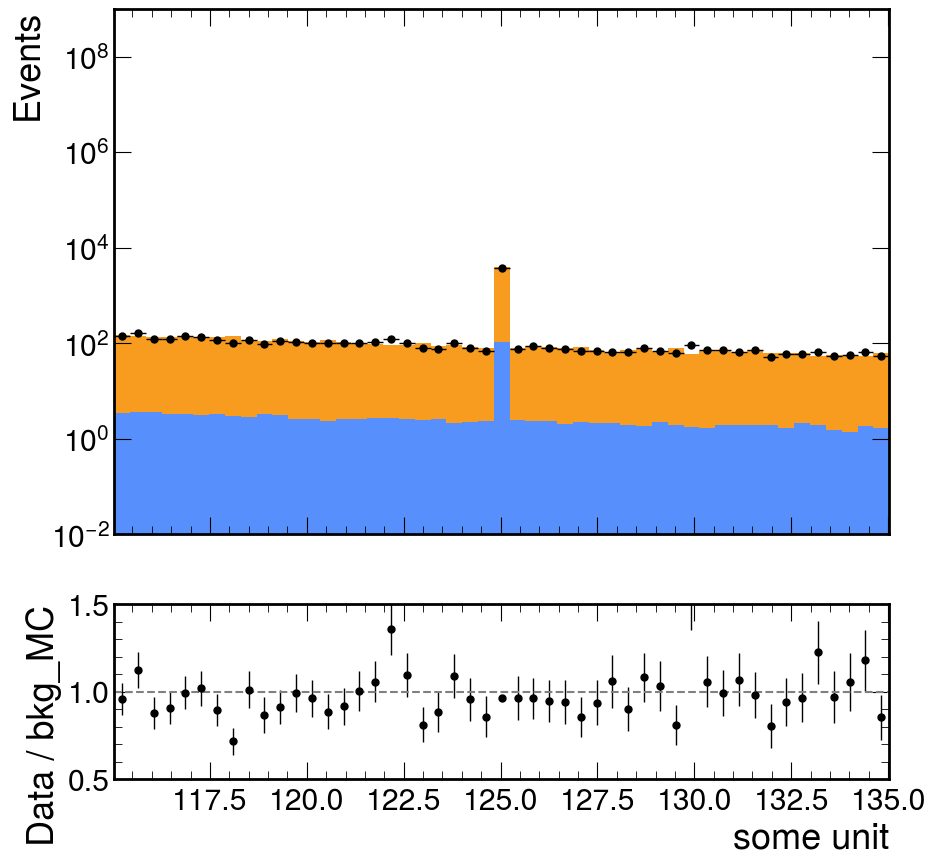

In [19]:
training_features = [
    "dimuon_mass",
    "dimuon_pt",
    "dimuon_pt_log",
    "dimuon_eta",
    "dimuon_ebe_mass_res",
    "dimuon_ebe_mass_res_rel",
    "dimuon_cos_theta_cs",
    "dimuon_phi_cs",
    "jet1_pt",
    "jet1_eta",
    "jet1_phi",
    "jet1_qgl",
    "jet2_pt",
    "jet2_eta",
    "jet2_phi",
    "jet2_qgl",
    "jj_mass",
    "jj_mass_log",
    "jj_dEta",
    "rpt",
    "ll_zstar_log",
    "mmj_min_dEta",
    "nsoftjets5",
    "htsoft2",
    # "year",
]

# -----------------------------------------
# plot data/MC for each training feature
# -----------------------------------------
load_path = "/work/users/yun79/stage2_output/test/vbf/2018"
data_events = ak.from_parquet(load_path+f"/processed_events_data.parquet")
dy_events = ak.from_parquet(load_path+f"/processed_events_bkgMC_dy.parquet")
ewk_events = ak.from_parquet(load_path+f"/processed_events_bkgMC_ewk.parquet")
vbf_events = ak.from_parquet(load_path+f"/processed_events_sigMC_vbf.parquet")
ggh_events = ak.from_parquet(load_path+f"/processed_events_sigMC_ggh.parquet")

print(data_events.fields)
for feature in training_features:
    print(f"feature: {feature}")
    data = {
        "values" :ak.to_numpy(data_events[feature]),
        "weights":ak.to_numpy(data_events.wgt_nominal_total )
    }
    bkg_MC_dict = {
        "EWK" :{
            "values" :ak.to_numpy(ewk_events[feature]),
            "weights":ak.to_numpy(ewk_events.wgt_nominal_total )
        },
        "DY" :{
            "values" :ak.to_numpy(dy_events[feature]),
            "weights":ak.to_numpy(dy_events.wgt_nominal_total )
        },     
    }
    sig_MC_dict = {
        "VBF" :{
            "values" :ak.to_numpy(vbf_events[feature]),
            "weights":ak.to_numpy(vbf_events.wgt_nominal_total )
        },
        "ggH" :{
            "values" :ak.to_numpy(ggh_events[feature]),
            "weights":ak.to_numpy(ggh_events.wgt_nominal_total )
        },     
    }
    max = ak.max(data_events[feature])
    min = ak.min(data_events[feature])
    binning = np.linspace(min, max, 50)
    save_full_path = f"./quick_plots/DNN_input/DNN_input_{feature}.pdf"
    plotDataMC_compare(
    binning, 
    data, 
    bkg_MC_dict, 
    save_full_path,
    sig_MC_dict=sig_MC_dict,
    title=feature + " Data/MC dist", 
    xtitle="some unit", 
    )